# Test Técnico - Procesamiento de Imagenes en Python

## Objetivos

- **Ajustar la imagen** denominada Test1.jpg a un tamaño de 1024x1024 pixeles
  
- **Partir la imagen:** La imagen modificada se deberá partir en 4 sub-imágenes que correspondan a 4 secciones o cuadrantes de la imagen original y se deberán graficar cada una de estas imágenes
  
- **Aplicar una ecualización** a la imagen y mostrar la gráfica resultante para cada color
  
- **Manipulación de imágenes binarias:** Dada la imagen Mask.png realizar el conteo del total de objetos binarios (células) determinar el promedio del área de los objetos y aplicar una operación morfológica de apertura
  
- **Combinar Imágenes:** Fusionar las dos imágenes y presentar una nueva imagen en donde las máscaras se observen en un color específico dentro de la imagen original Test: ejemplo color azul

### 1. Ajustar la imagen denominada Test1.jpg a un tamaño de 1024x1024 pixeles

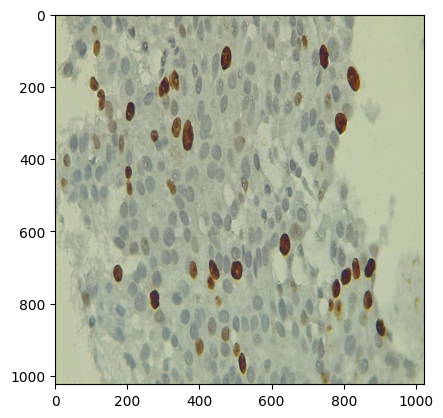

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Abrir la imagen con OpenCV 
image = cv2.imread('Test1.jpg')
# Redimensionar la imagen
resized_image = cv2.resize(image, (1024, 1024))
# Guardar la imagen ajustada
cv2.imwrite('Test1_resized.jpg', resized_image)

# Mostrar la imagen con el mismo color
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### 2. Partir la imagen en 4 sub-imágenes

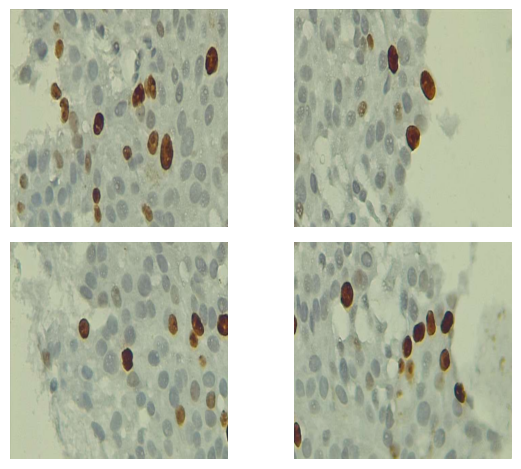

In [34]:
import cv2
import matplotlib.pyplot as plt

def split_image(image):
    """
    Divide la imagen ajustada en cuadrantes y los muestra en una cuadrícula 2x2.
    """
    height, width, _ = image.shape
    quadrants = [
        image[:height//2, :width//2],  # Top-left
        image[:height//2, width//2:],  # Top-right
        image[height//2:, :width//2],  # Bottom-left
        image[height//2:, width//2:]   # Bottom-right
    ]

    return quadrants

def display_quadrants(quadrants):
    """
    Muestra la imagen en una ventana emergente.
    """
    for i, quadrant in enumerate(quadrants, 1):
        plt.subplot(2, 2, i)
        plt.imshow(cv2.cvtColor(quadrant, cv2.COLOR_BGR2RGB))
        plt.axis('off') 
    plt.tight_layout()
    plt.show()

# Dividir la imagen en cuadrantes
quadrants = split_image(resized_image)
# Mostrar los cuadrantes
display_quadrants(quadrants)


### 3. Ecualización de la imagen por canal de color

**Objetivo:** Mejorar la calidad visual de la imagen ajustando el contraste de sus canales de color para obtener una representación más equilibrada. Esto se logra mediante ecualización de histograma, que redistribuye los niveles de intensidad de manera uniforme.

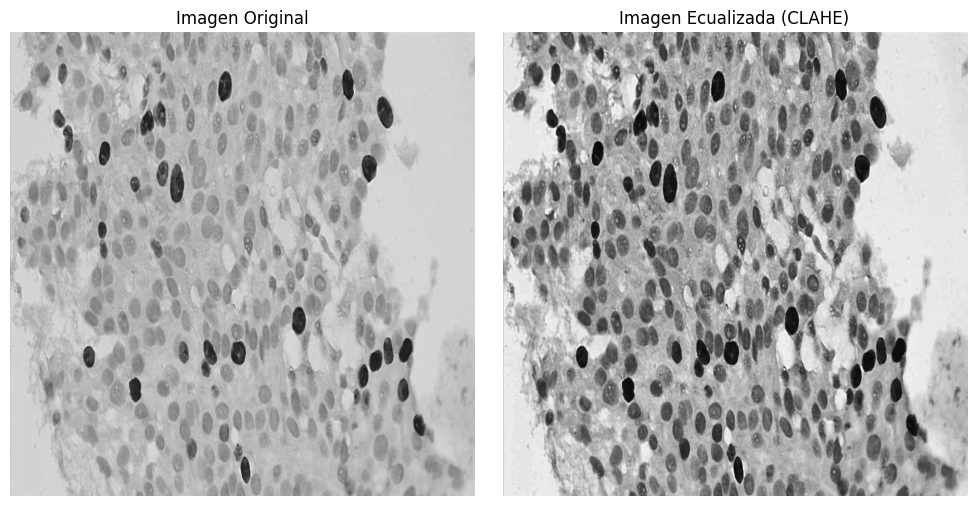

True

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('test1_resized.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(2, 2))  # división en 4 cuadrantes
equalized_image = clahe.apply(image)

# Visualizar la imagen original y ecualizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Ecualizada (CLAHE)")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Guardar la imagen ecualizada
cv2.imwrite('cell_image_equalized.tif', equalized_image)


### 4. Manipulación de imágenes binarias (Mask.png)

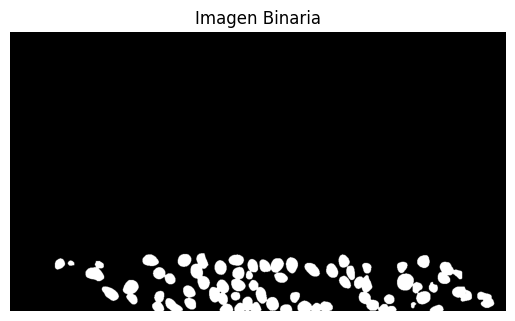

In [53]:
# Cargar la imagen binaria
mask = cv2.imread('Mask.tif', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen
plt.imshow(mask, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')
plt.show()

In [68]:
# Contar objetos binarios
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

# Excluir el fondo (label 0)
total_objects = num_labels - 1  # Resto el fondo
print(f"Total de objetos binarios: {total_objects}")


Total de objetos binarios: 41


In [ ]:
import numpy as np
#  Calcular áreas y promedio
areas = stats[1:, cv2.CC_STAT_AREA]  # Excluir el fondo (stats[0])
average_area = np.mean(areas)
print(f"Área promedio de los objetos: {average_area}")


Área promedio de los objetos: 1261.0487804878048


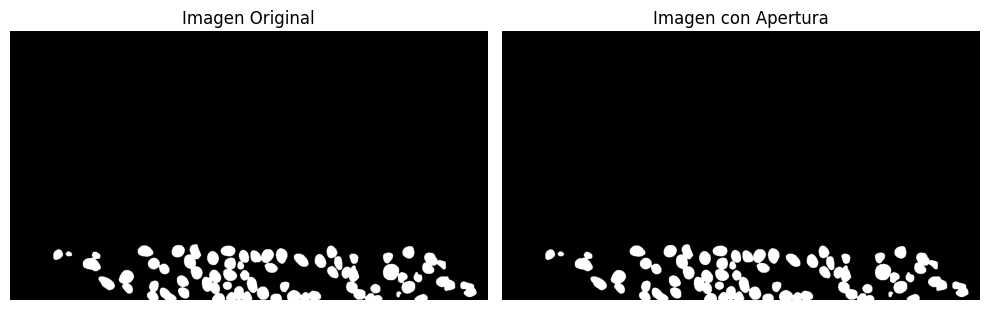

True

In [76]:
# Definir un kernel para la operación morfológica
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

# Aplicar la apertura
opened_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Mostrar la imagen original y la apertura
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen con Apertura")
plt.imshow(opened_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Guardar la imagen resultante
cv2.imwrite('Mask_Aperture.tif', opened_mask)


In [110]:
# Contar objetos binarios
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opened_mask)

# Excluir el fondo (label 0)
total_objects = num_labels - 1  # Resto el fondo
print(f"Total de objetos binarios: {total_objects}")


Total de objetos binarios: 42


In [79]:
import numpy as np
#  Calcular áreas y promedio
areas = stats[1:, cv2.CC_STAT_AREA]  # Excluir el fondo (stats[0])
average_area = np.mean(areas)
print(f"Área promedio de los objetos: {average_area}")


Área promedio de los objetos: 1227.7380952380952


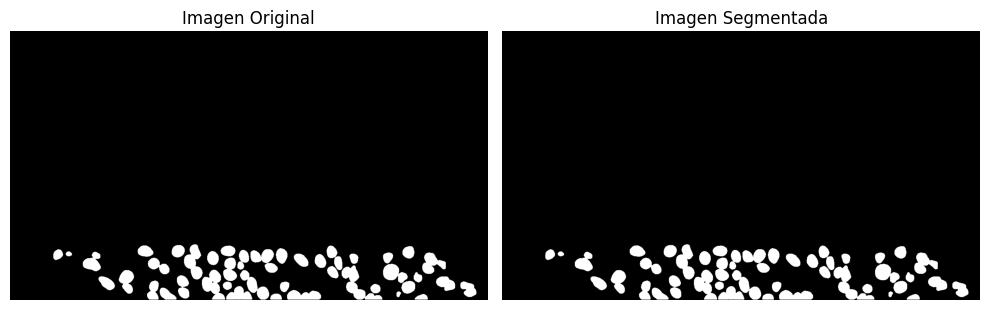

In [127]:
# Transformación de distancia
dist_transform = cv2.distanceTransform(opened_mask, cv2.DIST_L2, 5)

# Umbralización para obtener los marcadores
_, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Marcar áreas desconocidas (fondo)
unknown = cv2.subtract(opened_mask, sure_fg)

# Marcadores
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Asegurar que el fondo sea 1 en Watershed
markers[unknown == 255] = 0

# Convertir la imagen original a color para Watershed
color_image = cv2.cvtColor(opened_mask.copy(), cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(color_image, markers)

# Crear una nueva máscara segmentada
segmented_mask = opened_mask.copy()
segmented_mask[markers == -1] = 0 

# Mostrar la imagen original y la segmentada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(opened_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Imagen Segmentada")
plt.imshow(segmented_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


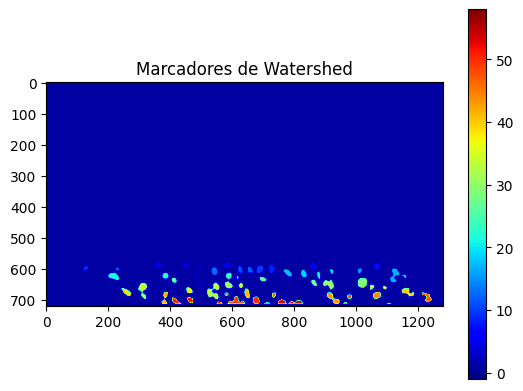

In [128]:
plt.imshow(markers, cmap='jet')
plt.title("Marcadores de Watershed")
plt.colorbar()
plt.show()